# Feature Extraction

### Combining Chroma and mfcc

In [134]:
import os 
import librosa
import math
import json
import numpy as np


DATASET_PATH = "cough_cleaned_touseef"
JSON_PATH = "new_features.json"
SAMPLE_RATE = 22050
DURATION = 8  # measured in seconds.
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION


def save_mfcc(dataset_path, json_path, n_mfcc = 13, n_fft = 2048, hop_length= 512, num_segments = 5):
   
    # dictionary to store data
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": []
    }
    
    num_samples_per_segment =  int(SAMPLES_PER_TRACK / num_segments)
    
    expected_no_of_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length) 
    
    # 1) Loop through all the genres
    for i, (dirpath, dirname, filenames) in enumerate(os.walk(dataset_path)):
        
        # Ensure that we r not at the root level
        if dirpath is not dataset_path:
            dirpath_components = dirpath.split("\\")  # "genre/blues" => ["genre", "blues"]
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            
            print("\n Processing {}".format(semantic_label))
            
            # Process files for specific genre. 
            for f in filenames:
                
                # laoding audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr = SAMPLE_RATE)
                
                # divide signals into segments,process segments, extract mfcc and at last store mfcc vectors.
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s  # if s= 0 -> then start_sample = 0 
                    finish_sample = start_sample + num_samples_per_segment  # if s=0 -> num_segments_per_sample
                    chroma = librosa.feature.chroma_stft(y=signal[start_sample: finish_sample], sr=sr,n_chroma=12, n_fft=4096)
                    cq = librosa.feature.chroma_cqt(y=chroma[0], sr=sr)
                    gh = cq.reshape(cq.shape[0]* cq.shape[1])
                    print(gh.shape)
                    
                    mfcc = librosa.feature.mfcc(gh,
                                                sr =sr,
                                                n_fft = n_fft,
                                                n_mfcc = n_mfcc,
                                                hop_length = hop_length
                                                )
#                     mfcc = mfcc.T
                    
#                     if len(mfcc) == expected_no_of_mfcc_vectors_per_segment:
    #                     mfcc = mfcc.T   # making mfcc vector suitable to our DL model.
                    data["mfcc"].append(mfcc.tolist()) # we can not append mfcc directly blc its a numpy array so we have
                    # to first convert it into list.

                    data["labels"].append(i-1)
                    # i mean in each iteration we are in different genre folder. why r we doing i -1 that's blc in first 
                    # iteration we were not inside the dir containing all the genres folder. 

                    print("{}, segment : {}".format(file_path, s))

    # final step: saving everything as a json file            
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent = 4)  # indent mean spaces while writing. fp mean file_path  
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments = 8)
                


 Processing Negative-con
(12,)
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 0
(12,)
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 1
(12,)
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 2
(12,)
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 3
(12,)
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 4
(12,)
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 5
(12,)
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 6
(12,)
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 7
(12,)
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 0
(12,)
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 1
(12,)
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 2
(12,)
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 3
(12,)
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 4
(12,)
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 5
(12,)
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 6
(12,)
c

 Processing Postive-con
(12,)
cough_cleaned_touseef\Postive-con\pos-1.wav, segment : 0
(12,)
cough_cleaned_touseef\Postive-con\pos-1.wav, segment : 1
(12,)
cough_cleaned_touseef\Postive-con\pos-1.wav, segment : 2
(12,)
cough_cleaned_touseef\Postive-con\pos-1.wav, segment : 3
(12,)
cough_cleaned_touseef\Postive-con\pos-1.wav, segment : 4
(12,)
cough_cleaned_touseef\Postive-con\pos-1.wav, segment : 5
(12,)
cough_cleaned_touseef\Postive-con\pos-1.wav, segment : 6
(12,)
cough_cleaned_touseef\Postive-con\pos-1.wav, segment : 7
(12,)
cough_cleaned_touseef\Postive-con\pos-10.wav, segment : 0
(12,)
cough_cleaned_touseef\Postive-con\pos-10.wav, segment : 1
(12,)
cough_cleaned_touseef\Postive-con\pos-10.wav, segment : 2
(12,)


C:\Users\Furqan Ali\Anaconda3\envs\tensorflow_env\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


cough_cleaned_touseef\Postive-con\pos-10.wav, segment : 3
(12,)
cough_cleaned_touseef\Postive-con\pos-10.wav, segment : 4
(12,)
cough_cleaned_touseef\Postive-con\pos-10.wav, segment : 5
(12,)
cough_cleaned_touseef\Postive-con\pos-10.wav, segment : 6
(12,)
cough_cleaned_touseef\Postive-con\pos-10.wav, segment : 7
(12,)
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 0
(12,)
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 1
(12,)
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 2
(12,)
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 3
(12,)
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 4
(12,)
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 5
(12,)
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 6
(12,)
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 7
(12,)
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 0
(12,)
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 1
(12,)
cough_cleaned_touseef\Postive-con\pos-12

# Combining mfcc and zero-crossing rate

In [219]:
import os 
import librosa
import math
import json


DATASET_PATH = "cough_cleaned_touseef"
JSON_PATH = "mfcc_zerocross.json"
SAMPLE_RATE = 22050
DURATION = 8  # measured in seconds.
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION


def save_mfcc(dataset_path, json_path, n_mfcc = 13, n_fft = 2048, hop_length= 512, num_segments = 5):
   
    # dictionary to store data
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": []
    }
    
    num_samples_per_segment =  int(SAMPLES_PER_TRACK / num_segments)
    
    expected_no_of_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length) 
    
    # 1) Loop through all the genres
    for i, (dirpath, dirname, filenames) in enumerate(os.walk(dataset_path)):
        
        # Ensure that we r not at the root level
        if dirpath is not dataset_path:
            dirpath_components = dirpath.split("\\")  # "genre/blues" => ["genre", "blues"]
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            
            print("\n Processing {}".format(semantic_label))
            
            # Process files for specific genre. 
            for f in filenames:
                
                # laoding audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr = SAMPLE_RATE)
                
                # divide signals into segments,process segments, extract mfcc and at last store mfcc vectors.
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s  # if s= 0 -> then start_sample = 0 
                    finish_sample = start_sample + num_samples_per_segment  # if s=0 -> num_segments_per_sample
#                     chroma = librosa.feature.chroma_stft(y=signal[start_sample: finish_sample], sr=sr,n_chroma=12, n_fft=4096)
#                     cq = librosa.feature.chroma_cqt(y=chroma[0], sr=sr)
#                     gh = cq.reshape(cq.shape[0]* cq.shape[1])
#                     print(gh.shape)
                    
                    mfcc = librosa.feature.mfcc(signal[start_sample: finish_sample],
                                                sr =sr,
                                                n_fft = n_fft,
                                                n_mfcc = n_mfcc,
                                                hop_length = hop_length
                                                )
                    
                    hhh = mfcc.reshape(mfcc.shape[0]*mfcc.shape[1])

                    zcr = librosa.feature.zero_crossing_rate(hhh)
                    zcr = zcr.T
                    
#                     if len(mfcc) == expected_no_of_mfcc_vectors_per_segment:
    #                     mfcc = mfcc.T   # making mfcc vector suitable to our DL model.
                    data["mfcc"].append(zcr.tolist()) # we can not append mfcc directly blc its a numpy array so we have
                    # to first convert it into list.

                    data["labels"].append(i-1)
                    # i mean in each iteration we are in different genre folder. why r we doing i -1 that's blc in first 
                    # iteration we were not inside the dir containing all the genres folder. 

                    print("{}, segment : {}".format(file_path, s))

    # final step: saving everything as a json file            
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent = 4)  # indent mean spaces while writing. fp mean file_path  
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments = 8)
                


 Processing Negative-con
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 3
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 4
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 5
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 6
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 7
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 3
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 4
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 5
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 6
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 7
cough_cleaned_touseef\Negative-con\neg

cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 0
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 1
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 2
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 3
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 4
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 5
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 6
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 7
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 0
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 1
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 2
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 3
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 4
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 5
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 6
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 7
cough_cleaned_touseef\Postive-con\pos-13.wav, segment : 0
cough_cleaned_

# USING Roll off Features

In [224]:
import os 
import librosa
import math
import json


DATASET_PATH = "cough_cleaned_touseef"
JSON_PATH = "roll_off.json"
SAMPLE_RATE = 22050
DURATION = 8  # measured in seconds.
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION


def save_mfcc(dataset_path, json_path, n_mfcc = 13, n_fft = 2048, hop_length= 512, num_segments = 5):
   
    # dictionary to store data
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": []
    }
    
    num_samples_per_segment =  int(SAMPLES_PER_TRACK / num_segments)
    
    expected_no_of_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length) 
    
    for i, (dirpath, dirname, filenames) in enumerate(os.walk(dataset_path)):
        
        # Ensure that we r not at the root level
        if dirpath is not dataset_path:
            dirpath_components = dirpath.split("\\")  # "genre/blues" => ["genre", "blues"]
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            
            print("\n Processing {}".format(semantic_label))
            
            # Process files for specific genre. 
            for f in filenames:
                
                # laoding audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr = SAMPLE_RATE)
                
                # divide signals into segments,process segments, extract mfcc and at last store mfcc vectors.
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s  # if s= 0 -> then start_sample = 0 
                    finish_sample = start_sample + num_samples_per_segment 
                    
                    rolloff = librosa.feature.spectral_rolloff(y=signal[start_sample: finish_sample], sr=sr, roll_percent=0.1)
#                     chroma = librosa.feature.chroma_stft(y=signal[start_sample: finish_sample], sr=sr,n_chroma=12, n_fft=4096)
#                     cq = librosa.feature.chroma_cqt(y=chroma[0], sr=sr)
#                     gh = cq.reshape(cq.shape[0]* cq.shape[1])
#                     print(gh.shape)
                    
#                     mfcc = librosa.feature.mfcc(signal[start_sample: finish_sample],
#                                                 sr =sr,
#                                                 n_fft = n_fft,
#                                                 n_mfcc = n_mfcc,
#                                                 hop_length = hop_length
#                                                 )
                    
#                     hhh = mfcc.reshape(mfcc.shape[0]*mfcc.shape[1])

#                     zcr = librosa.feature.zero_crossing_rate(hhh)
                    rolloff = rolloff.T
                    
#                     if len(mfcc) == expected_no_of_mfcc_vectors_per_segment:
    #                     mfcc = mfcc.T   # making mfcc vector suitable to our DL model.
                    data["mfcc"].append(rolloff.tolist()) # we can not append mfcc directly blc its a numpy array so we have
                    # to first convert it into list.

                    data["labels"].append(i-1)
                    # i mean in each iteration we are in different genre folder. why r we doing i -1 that's blc in first 
                    # iteration we were not inside the dir containing all the genres folder. 

                    print("{}, segment : {}".format(file_path, s))

    # final step: saving everything as a json file            
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent = 4)  # indent mean spaces while writing. fp mean file_path  
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments = 8)
                


 Processing Negative-con
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 3
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 4
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 5
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 6
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 7
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 3
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 4
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 5
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 6
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 7
cough_cleaned_touseef\Negative-con\neg

cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 0
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 1
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 2
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 3
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 4
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 5
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 6
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 7
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 0
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 1
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 2
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 3
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 4
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 5
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 6
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 7
cough_cleaned_touseef\Postive-con\pos-13.wav, segment : 0
cough_cleaned_

# Combining any three features:

In [311]:
import os 
import librosa
import math
import numpy as np
import json


DATASET_PATH = "cough_cleaned_touseef"
JSON_PATH = "rolloff_rms.json"
SAMPLE_RATE = 22050
DURATION = 8  # measured in seconds.
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION


def save_mfcc(dataset_path, json_path, n_mfcc = 13, n_fft = 2048, hop_length= 512, num_segments = 5):
   
    # dictionary to store data
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": []
    }
    
    num_samples_per_segment =  int(SAMPLES_PER_TRACK / num_segments)
    
    expected_no_of_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length) 
    
    for i, (dirpath, dirname, filenames) in enumerate(os.walk(dataset_path)):
        
        # Ensure that we r not at the root level
        if dirpath is not dataset_path:
            dirpath_components = dirpath.split("\\")  # "genre/blues" => ["genre", "blues"]
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            
            print("\n Processing {}".format(semantic_label))
            
            # Process files for specific genre. 
            for f in filenames:
                
                # laoding audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr = SAMPLE_RATE)
                
                # divide signals into segments,process segments, extract mfcc and at last store mfcc vectors.
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s  # if s= 0 -> then start_sample = 0 
                    finish_sample = start_sample + num_samples_per_segment 
                    
                    rms = librosa.feature.rms(y = signal[start_sample: finish_sample])
                    rms_sha = rms.reshape(rms.shape[0]*rms.shape[1])
                    rolloff = librosa.feature.spectral_rolloff(y=rms_sha, sr=sr, roll_percent=0.1)
                    rolloff_sha = rolloff.reshape(rolloff.shape[0]*rolloff.shape[1])
                    S = np.abs(librosa.stft(rolloff_sha))
                    p2 = librosa.feature.poly_features(S=S, order=2)
                    
                    
                    data["mfcc"].append(p2.tolist()) # we can not append mfcc directly blc its a numpy array so we have
                    # to first convert it into list.

                    data["labels"].append(i-1)
                    # i mean in each iteration we are in different genre folder. why r we doing i -1 that's blc in first 
                    # iteration we were not inside the dir containing all the genres folder. 

                    print("{}, segment : {}".format(file_path, s))

    # final step: saving everything as a json file            
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent = 4)  # indent mean spaces while writing. fp mean file_path  
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments = 8)
                


 Processing Negative-con
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 3
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 4
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 5
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 6
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 7
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 3
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 4
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 5
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 6
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 7
cough_cleaned_touseef\Negative-con\neg

cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 0
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 1
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 2
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 3
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 4
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 5
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 6
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 7
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 0
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 1
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 2
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 3
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 4
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 5
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 6
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 7
cough_cleaned_touseef\Postive-con\pos-13.wav, segment : 0
cough_cleaned_

# Combining 3 imp features

In [319]:
import os 
import librosa
import math
import json


DATASET_PATH = "cough_cleaned_touseef"
JSON_PATH = "rms_roll_mfcc.json"
SAMPLE_RATE = 22050
DURATION = 8  # measured in seconds.
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION


def save_mfcc(dataset_path, json_path, n_mfcc = 13, n_fft = 2048, hop_length= 512, num_segments = 5):
   
    # dictionary to store data
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": []
    }
    
    num_samples_per_segment =  int(SAMPLES_PER_TRACK / num_segments)
    
    expected_no_of_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length) 
    
    for i, (dirpath, dirname, filenames) in enumerate(os.walk(dataset_path)):
        
        # Ensure that we r not at the root level
        if dirpath is not dataset_path:
            dirpath_components = dirpath.split("\\")  # "genre/blues" => ["genre", "blues"]
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            
            print("\n Processing {}".format(semantic_label))
            
            # Process files for specific genre. 
            for f in filenames:
                
                # laoding audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr = SAMPLE_RATE)
                
                # divide signals into segments,process segments, extract mfcc and at last store mfcc vectors.
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s  # if s= 0 -> then start_sample = 0 
                    finish_sample = start_sample + num_samples_per_segment 
                    
                    rms = librosa.feature.rms(y = signal[start_sample: finish_sample])
                    rms_sha = rms.reshape(rms.shape[0]*rms.shape[1])
                    rolloff = librosa.feature.spectral_rolloff(y=rms_sha, sr=sr, roll_percent=0.1)
                    rolloff_sha = rolloff.reshape(rolloff.shape[0]*rolloff.shape[1])
                    
                    mfcc = librosa.feature.mfcc(rolloff_sha,
                                                sr =sr,
                                                n_fft = n_fft,
                                                n_mfcc = n_mfcc,
                                                hop_length = hop_length
                                                )
                    
#                     mfcc = mfcc.T
                    
#                      if len(mfcc) == expected_no_of_mfcc_vectors_per_segment:
    #                     mfcc = mfcc.T   # making mfcc vector suitable to our DL model.
                    data["mfcc"].append(mfcc.tolist()) # we can not append mfcc directly blc its a numpy array so we have
                    # to first convert it into list.

                    data["labels"].append(i-1)
                    # i mean in each iteration we are in different genre folder. why r we doing i -1 that's blc in first 
                    # iteration we were not inside the dir containing all the genres folder. 

                    print("{}, segment : {}".format(file_path, s))

    # final step: saving everything as a json file            
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent = 4)  # indent mean spaces while writing. fp mean file_path  
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments = 8)
                


 Processing Negative-con
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 3
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 4
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 5
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 6
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 7
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 3
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 4
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 5
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 6
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 7
cough_cleaned_touseef\Negative-con\neg

cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 0
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 1
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 2
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 3
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 4
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 5
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 6
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 7
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 0
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 1
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 2
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 3
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 4
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 5
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 6
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 7
cough_cleaned_touseef\Postive-con\pos-13.wav, segment : 0
cough_cleaned_

# USING Roll oFF and MFCC

In [357]:
import os 
import librosa
import math
import json


DATASET_PATH = "cough_cleaned_touseef"
JSON_PATH = "roll_mfcc.json"
SAMPLE_RATE = 22050
DURATION = 8  # measured in seconds.
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION

def save_mfcc(dataset_path, json_path, n_mfcc = 13, n_fft = 2048, hop_length= 512, num_segments = 5):
   
    # dictionary to store data
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": []
    }
    
    num_samples_per_segment =  int(SAMPLES_PER_TRACK / num_segments)
    
    expected_no_of_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length) 
    
    for i, (dirpath, dirname, filenames) in enumerate(os.walk(dataset_path)):
        
        # Ensure that we r not at the root level
        if dirpath is not dataset_path:
            dirpath_components = dirpath.split("\\")  # "genre/blues" => ["genre", "blues"]
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            
            print("\n Processing {}".format(semantic_label))
            
            # Process files for specific genre. 
            for f in filenames:
                
                # laoding audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr = SAMPLE_RATE)
                
                # divide signals into segments,process segments, extract mfcc and at last store mfcc vectors.
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s  # if s= 0 -> then start_sample = 0 
                    finish_sample = start_sample + num_samples_per_segment 
                    
                    rolloff = librosa.feature.spectral_rolloff(y=signal[start_sample: finish_sample], sr=sr, roll_percent=0.1)
                    rolloff_sha = rolloff.reshape(rolloff.shape[0]*rolloff.shape[1])
                    
                    mfcc = librosa.feature.mfcc(rolloff_sha,
                                                sr =sr,
                                                n_fft = n_fft,
                                                n_mfcc = n_mfcc,
                                                hop_length = hop_length
                                                )
                    
#                     mfcc = mfcc.T
                    
#                     if len(mfcc) == expected_no_of_mfcc_vectors_per_segment:
#                         mfcc = mfcc.T   # making mfcc vector suitable to our DL model.
                    data["mfcc"].append(mfcc.tolist()) # we can not append mfcc directly blc its a numpy array so we have
                    # to first convert it into list.

                    data["labels"].append(i-1)
                    # i mean in each iteration we are in different genre folder. why r we doing i -1 that's blc in first 
                    # iteration we were not inside the dir containing all the genres folder. 

                    print("{}, segment : {}".format(file_path, s))

    # final step: saving everything as a json file            
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent = 4)  # indent mean spaces while writing. fp mean file_path  
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments = 8)
                


 Processing Negative-con
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 3
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 4
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 5
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 6
cough_cleaned_touseef\Negative-con\neg-1.wav, segment : 7
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 0
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 1
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 2
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 3
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 4
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 5
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 6
cough_cleaned_touseef\Negative-con\neg-11.wav, segment : 7
cough_cleaned_touseef\Negative-con\neg

cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 0
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 1
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 2
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 3
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 4
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 5
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 6
cough_cleaned_touseef\Postive-con\pos-11.wav, segment : 7
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 0
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 1
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 2
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 3
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 4
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 5
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 6
cough_cleaned_touseef\Postive-con\pos-12.wav, segment : 7
cough_cleaned_touseef\Postive-con\pos-13.wav, segment : 0
cough_cleaned_

# Using Rolloff and MFCC

In [ ]:
import os 
import librosa
import math
import json

DATASET_PATH = "recent_toufeeq_cough_data"
JSON_PATH = "roll_mfcc_testing1.json"
SAMPLE_RATE = 22050
DURATION = 8  # measured in seconds.
SAMPLES_PER_TRACK = SAMPLE_RATE * DURATION


def save_mfcc(dataset_path, json_path, n_mfcc = 13, n_fft = 2048, hop_length= 512, num_segments = 5):
   
    # dictionary to store data
    data = {
        "mapping": [],
        "mfcc": [],
        "labels": []
    }
    
    num_samples_per_segment =  int(SAMPLES_PER_TRACK / num_segments)
    
    expected_no_of_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length) 
    
    for i, (dirpath, dirname, filenames) in enumerate(os.walk(dataset_path)):
        
        # Ensure that we r not at the root level
        if dirpath is not dataset_path:
            dirpath_components = dirpath.split("\\")  # "genre/blues" => ["genre", "blues"]
            semantic_label = dirpath_components[-1]
            data["mapping"].append(semantic_label)
            
            print("\n Processing {}".format(semantic_label))
            
            # Process files for specific genre. 
            for f in filenames:
                
                # laoding audio file
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr = SAMPLE_RATE)
                
                # divide signals into segments,process segments, extract mfcc and at last store mfcc vectors.
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s  # if s= 0 -> then start_sample = 0 
                    finish_sample = start_sample + num_samples_per_segment 
                    
                    rolloff = librosa.feature.spectral_rolloff(y=signal[start_sample: finish_sample], sr=sr, roll_percent=0.1)
                    rolloff_sha = rolloff.reshape(rolloff.shape[0]*rolloff.shape[1])
                    
                    mfcc = librosa.feature.mfcc(rolloff_sha,
                                                sr =sr,
                                                n_fft = n_fft,
                                                n_mfcc = n_mfcc,
                                                hop_length = hop_length
                                                )
                    
#                     mfcc = mfcc.T
                    
#                     if len(mfcc) == expected_no_of_mfcc_vectors_per_segment:
#                         mfcc = mfcc.T   # making mfcc vector suitable to our DL model.
                    data["mfcc"].append(mfcc.tolist()) # we can not append mfcc directly blc its a numpy array so we have
                    # to first convert it into list.

                    data["labels"].append(i-1)
                    # i mean in each iteration we are in different genre folder. why r we doing i -1 that's blc in first 
                    # iteration we were not inside the dir containing all the genres folder. 

                    print("{}, segment : {}".format(file_path, s))

    # final step: saving everything as a json file            
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent = 4)  # indent mean spaces while writing. fp mean file_path  
        
        
if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments = 8)
                

# For visualizing 

In [49]:
import os 
import librosa
import math
import json
import librosa.display

path = "/Users/Furqan Ali/Desktop/saylani_python/Coursera_learning/virufy_cleaned_file/cough_cleaned_touseef/Postive-con/pos-1.wav"
sr = 22050


# Zero crossing rate
y, sr = librosa.load(path, sr = sr)
zc = librosa.feature.chroma_stft(y=y, sr=sr,n_chroma=12, n_fft=4096)

mfcc = librosa.feature.mfcc(y,
                                sr =sr,
                                n_fft = 2048,
                                n_mfcc = 13,
                                hop_length = 512
                                )
                    
chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)

pitches, magnitudes = librosa.piptrack(y=y, sr=sr)
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.1)

features = np.concatenate((mfcc, chroma_cq, pitches, rolloff), axis = 0)

features = features.T
# zc = librosa.feature.zero_crossing_rate(y)

# print(spectral_entropy(zc, 100, method='welch', normalize=True))

# librosa.display.waveplot(zc[0], sr)

print(mfcc.shape)
print(chroma_cq.shape)
print(pitches.shape)
print(rolloff.shape)
print(features.shape)

(13, 454)
(12, 454)
(1025, 454)
(1, 454)
(454, 1051)


In [ ]:
# for plotting chroma graph

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
librosa.display.specshow(features, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()
plt.show()

In [ ]:
# so here is very imp note for all 
# why dont we just make many segments of our audio sample and then classiy all those segments al together and then take a mean
# of all those samples and give 1 output so lets say if we have noise in the cough so normally when we have multiple segments 
# so some of segents will be containing noise and some of them will be containng meaningfull iformation and so when u do 
# classification on all those segments so most prbbaly the part which is conating cough will always predict right and the one 
# containng nouse will not get predicted well. 

In [485]:
# Random trial for testing stored data

import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json

DATASET_PATH = "roll_mfcc.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)
print(X.shape)
print(X[0].shape)

(256, 13, 1)
(13, 1)


# SVM model 1

In [111]:
# Without normalising

import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

DATASET_PATH = "chroma.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=10)

# training = X_train.reshape((X_train.shape[1], X_train.shape[2]))

# training = np.reshape(X_train, (X_train.shape[1], X_train.shape[2]))

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


# training = X_train.shape[1], X_train.shape[2])
# Simple SVM
print('fitting...')
clf = SVC(C=20, gamma=0.00001)
# min no of c at which accuracy doesnt decrease
clf.fit(training, y_train)
acc = clf.score(test, y_test)
print("acc=%0.3f" % acc)
predicted=clf.predict(test)
print("The accuracy score on test set is :",  accuracy_score(y_test,predicted))


fitting...
acc=0.495
The accuracy score on test set is : 0.49514563106796117


# Model 2

In [188]:
# Without normalising

import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

DATASET_PATH = "chroma_mfcc.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=51)

# training = X_train.reshape((X_train.shape[1], X_train.shape[2]))

# training = np.reshape(X_train, (X_train.shape[1], X_train.shape[2]))

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


# training = X_train.shape[1], X_train.shape[2])
# Simple SVM
print('fitting...')
clf = SVC(C=20, gamma=0.00001)
# min no of c at which accuracy doesnt decrease
clf.fit(training, y_train)
acc = clf.score(test, y_test)
print("acc=%0.3f" % acc)
predicted=clf.predict(test)
print("The accuracy score on test set is :",  accuracy_score(y_test,predicted))


fitting...
acc=0.515
The accuracy score on test set is : 0.5145631067961165


In [220]:
# Without normalising

import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

DATASET_PATH = "mfcc_zerocross.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=31)

# training = X_train.reshape((X_train.shape[1], X_train.shape[2]))

# training = np.reshape(X_train, (X_train.shape[1], X_train.shape[2]))

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


# training = X_train.shape[1], X_train.shape[2])
# Simple SVM
print('fitting...')
clf = SVC(C=20, gamma=0.00001)
# min no of c at which accuracy doesnt decrease
clf.fit(training, y_train)
acc = clf.score(test, y_test)
print("acc=%0.3f" % acc)
predicted=clf.predict(test)
print("The accuracy score on test set is :",  accuracy_score(y_test,predicted))


fitting...
acc=0.495
The accuracy score on test set is : 0.49514563106796117


# SVM with rolloff features

In [235]:
# Without normalising

import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

DATASET_PATH = "roll_off.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=30)

# training = X_train.reshape((X_train.shape[1], X_train.shape[2]))

# training = np.reshape(X_train, (X_train.shape[1], X_train.shape[2]))

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


# training = X_train.shape[1], X_train.shape[2])
# Simple SVM
print('fitting...')
clf = SVC(C=20, gamma=0.00001)
# min no of c at which accuracy doesnt decrease
clf.fit(training, y_train)
acc = clf.score(test, y_test)
print("acc=%0.3f" % acc)
predicted=clf.predict(test)
print("The accuracy score on test set is :",  accuracy_score(y_test,predicted))


fitting...
acc=0.655
The accuracy score on test set is : 0.6551724137931034


# Roll off is performing better on SVM

# SVM with 3 features

In [309]:
# Without normalising

import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

DATASET_PATH = "3_combined_features.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=35)

# training = X_train.reshape((X_train.shape[1], X_train.shape[2]))

# training = np.reshape(X_train, (X_train.shape[1], X_train.shape[2]))

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


# training = X_train.shape[1], X_train.shape[2])
# Simple SVM
print('fitting...')
clf = SVC(C=20, gamma=0.01)
# min no of c at which accuracy doesnt decrease
clf.fit(training, y_train)
acc = clf.score(test, y_test)
print("acc=%0.3f" % acc)
predicted=clf.predict(test)
print("The accuracy score on test set is :",  accuracy_score(y_test,predicted))


fitting...
acc=0.495
The accuracy score on test set is : 0.49514563106796117


# SVM 3 famous combined features

In [484]:
# Without normalising

import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

DATASET_PATH = "rms_roll_mfcc.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=17)

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


# training = X_train.shape[1], X_train.shape[2])
# Simple SVM
print('fitting...')
clf = SVC(C=3, gamma=0.0001)
# min no of c at which accuracy doesnt decrease
clf.fit(training, y_train)
acc = clf.score(test, y_test)
print("acc=%0.3f" % acc)
predicted=clf.predict(test)
print("The accuracy score on test set is :",  accuracy_score(y_test,predicted))


fitting...
acc=0.476
The accuracy score on test set is : 0.47572815533980584


# SVM ROLL+MFCC

In [467]:
# Without normalising

import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

DATASET_PATH = "roll_mfcc.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=30)

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))

# training = X_train.shape[1], X_train.shape[2])
# Simple SVM
print('fitting...')
clf = SVC(C = 3, gamma = 0.0001)      
# min no of c at which accuracy doesnt decrease
clf.fit(training, y_train)
acc = clf.score(test, y_test)
print("acc=%0.3f" % acc)
predicted=clf.predict(test)
print("The accuracy score on test set is :",  accuracy_score(y_test,predicted))


fitting...
acc=0.660
The accuracy score on test set is : 0.6601941747572816


# Random_forest 

## Roll+mfcc

Model is running .....
Testing Accuracy: 0.6504854368932039

ROC curve value is:  0.6982237339380196
Confusion matrix, without normalization
[[33 16]
 [20 34]]


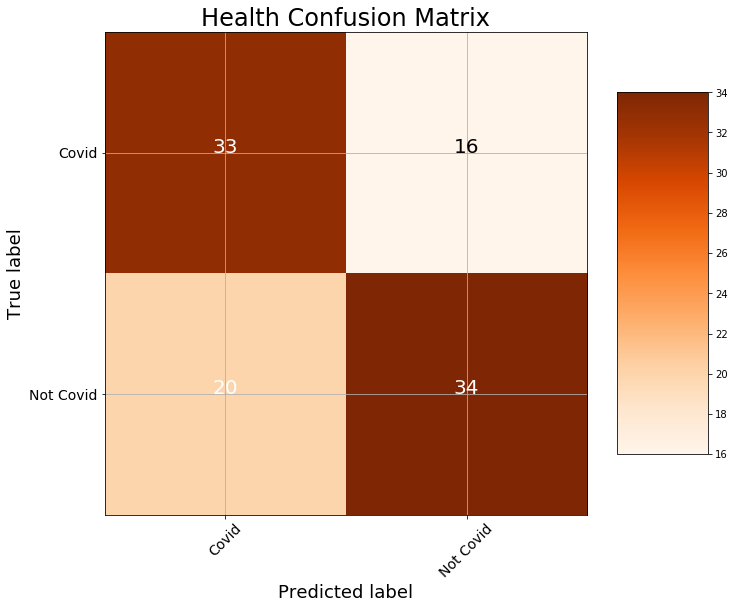

In [496]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools

DATASET_PATH = "roll_mfcc.json"

def load_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
        
    # converting lists into numpy arrays
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    
    return X, y

X, y = load_data(DATASET_PATH)

# normalized_X = preprocessing.normalize(X)

# Split data into training and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=45, shuffle=True)

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


#Create a Gaussian Classifier
clf=RandomForestClassifier(max_depth=50, random_state=48, n_estimators=97)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(training, y_train)

y_pred=clf.predict(test)

# Model Accuracy, how often is the classifier correct

print("Model is running .....")
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

# Probabilities for each class
rf_probs = clf.predict_proba(test)[:, 1]

# Calculate roc auc
roc_value = roc_auc_score(y_test, rf_probs)
print()
print("ROC curve value is: ",roc_value)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    # Plot the confusion matrix
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['Covid', 'Not Covid'],
                      title = 'Health Confusion Matrix')

plt.savefig('cm78.png')

# Making random forest class

In [29]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools


class RF_Model:
    def __init__(self, dataset_path, test_size, ran_state, rf_maxdepth, rf_ran_state, rf_estimators):
        self.dataset_path = dataset_path
        self.test_size = test_size
        self.ran_state = ran_state
        self.rf_maxdepth = rf_maxdepth
        self.rf_ran_state = rf_ran_state
        self.rf_estimators = rf_estimators
    

    def load_data(self):
        with open(self.dataset_path, "r") as fp:
            data = json.load(fp)

        # converting lists into numpy arrays
        X = np.array(data["mfcc"])
        y = np.array(data["labels"])

        return X, y
    
    def model(self):
        X, y = self.load_data()

        # normalized_X = preprocessing.normalize(X)

        # Split data into training and test subsets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.ran_state, 
                                                            shuffle=True)

        training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
        test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))

        accuracy_history = []
        
        for max_depth in range(1, self.rf_maxdepth):
            for estimators in range(1, rf_estimators):
                #Create a Random forest Clcassifier
                clf=RandomForestClassifier(max_depth=max_depth, random_state=self.rf_ran_state,
                                           n_estimators = estimators)

                #Train the model using the training sets y_pred=clf.predict(X_test)
                clf.fit(training, y_train)

                y_pred=clf.predict(test)
                accuracy = accuracy_score(y_pred,y_test)
                print("Accuracy on test dataset with maxDepth: ", max_depth, "estimators", estimators,"Accuracy: ", accuracy)

        # Model Accuracy, how often is the classifier correct

        print("Model is running .....")
        print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

        # Probabilities for each class
        rf_probs = clf.predict_proba(test)[:, 1]

        # Calculate roc auc
        roc_value = roc_auc_score(y_test, rf_probs)
        print()
        print("ROC curve value is: ",roc_value)
        print()
        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        self.plot_confusion_matrix(cm, classes = ['Covid', 'Not Covid'],
                              title = 'Health Confusion Matrix')

        plt.savefig('dadasdsd.png')
        
        return (clf, y_pred)

    def plot_confusion_matrix(self, cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Oranges):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        # Plot the confusion matrix
        plt.figure(figsize = (10, 10))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title, size = 24)
        plt.colorbar(aspect=4)
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45, size = 14)
        plt.yticks(tick_marks, classes, size = 14)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.

        # Labeling the plot
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.grid(None)
        plt.tight_layout()
        plt.ylabel('True label', size = 18)
        plt.xlabel('Predicted label', size = 18)
        

In [30]:
ff = [i for i in range(600)]

Accuracy on test dataset with maxDepth:  1 estimators 1 Accuracy:  0.6333333333333333
Accuracy on test dataset with maxDepth:  1 estimators 2 Accuracy:  0.36666666666666664
Accuracy on test dataset with maxDepth:  1 estimators 3 Accuracy:  0.4
Accuracy on test dataset with maxDepth:  1 estimators 4 Accuracy:  0.3333333333333333
Accuracy on test dataset with maxDepth:  1 estimators 5 Accuracy:  0.36666666666666664
Accuracy on test dataset with maxDepth:  1 estimators 6 Accuracy:  0.3333333333333333
Accuracy on test dataset with maxDepth:  1 estimators 7 Accuracy:  0.4
Accuracy on test dataset with maxDepth:  1 estimators 8 Accuracy:  0.43333333333333335
Accuracy on test dataset with maxDepth:  1 estimators 9 Accuracy:  0.4
Accuracy on test dataset with maxDepth:  1 estimators 10 Accuracy:  0.43333333333333335
Accuracy on test dataset with maxDepth:  1 estimators 11 Accuracy:  0.43333333333333335
Accuracy on test dataset with maxDepth:  1 estimators 12 Accuracy:  0.43333333333333335
Accu

Accuracy on test dataset with maxDepth:  2 estimators 14 Accuracy:  0.5
Accuracy on test dataset with maxDepth:  2 estimators 15 Accuracy:  0.5
Accuracy on test dataset with maxDepth:  2 estimators 16 Accuracy:  0.5
Accuracy on test dataset with maxDepth:  2 estimators 17 Accuracy:  0.5
Accuracy on test dataset with maxDepth:  2 estimators 18 Accuracy:  0.5
Accuracy on test dataset with maxDepth:  2 estimators 19 Accuracy:  0.5
Accuracy on test dataset with maxDepth:  2 estimators 20 Accuracy:  0.5
Accuracy on test dataset with maxDepth:  2 estimators 21 Accuracy:  0.5666666666666667
Accuracy on test dataset with maxDepth:  2 estimators 22 Accuracy:  0.5
Accuracy on test dataset with maxDepth:  2 estimators 23 Accuracy:  0.4666666666666667
Accuracy on test dataset with maxDepth:  2 estimators 24 Accuracy:  0.4666666666666667
Accuracy on test dataset with maxDepth:  2 estimators 25 Accuracy:  0.43333333333333335
Accuracy on test dataset with maxDepth:  2 estimators 26 Accuracy:  0.46666

Accuracy on test dataset with maxDepth:  3 estimators 31 Accuracy:  0.36666666666666664
Accuracy on test dataset with maxDepth:  3 estimators 32 Accuracy:  0.4
Accuracy on test dataset with maxDepth:  3 estimators 33 Accuracy:  0.4
Accuracy on test dataset with maxDepth:  3 estimators 34 Accuracy:  0.4
Accuracy on test dataset with maxDepth:  3 estimators 35 Accuracy:  0.4
Accuracy on test dataset with maxDepth:  3 estimators 36 Accuracy:  0.4
Accuracy on test dataset with maxDepth:  3 estimators 37 Accuracy:  0.4
Accuracy on test dataset with maxDepth:  3 estimators 38 Accuracy:  0.4
Accuracy on test dataset with maxDepth:  3 estimators 39 Accuracy:  0.4
Accuracy on test dataset with maxDepth:  3 estimators 40 Accuracy:  0.4
Accuracy on test dataset with maxDepth:  3 estimators 41 Accuracy:  0.36666666666666664
Accuracy on test dataset with maxDepth:  3 estimators 42 Accuracy:  0.4
Accuracy on test dataset with maxDepth:  3 estimators 43 Accuracy:  0.36666666666666664
Accuracy on test

Accuracy on test dataset with maxDepth:  4 estimators 48 Accuracy:  0.5333333333333333
Accuracy on test dataset with maxDepth:  4 estimators 49 Accuracy:  0.5666666666666667
Accuracy on test dataset with maxDepth:  4 estimators 50 Accuracy:  0.5333333333333333
Accuracy on test dataset with maxDepth:  4 estimators 51 Accuracy:  0.5666666666666667
Accuracy on test dataset with maxDepth:  4 estimators 52 Accuracy:  0.5666666666666667
Accuracy on test dataset with maxDepth:  4 estimators 53 Accuracy:  0.6
Accuracy on test dataset with maxDepth:  4 estimators 54 Accuracy:  0.5333333333333333
Accuracy on test dataset with maxDepth:  4 estimators 55 Accuracy:  0.5666666666666667
Accuracy on test dataset with maxDepth:  4 estimators 56 Accuracy:  0.5333333333333333
Accuracy on test dataset with maxDepth:  4 estimators 57 Accuracy:  0.5666666666666667
Accuracy on test dataset with maxDepth:  4 estimators 58 Accuracy:  0.5666666666666667
Accuracy on test dataset with maxDepth:  4 estimators 59 A

Accuracy on test dataset with maxDepth:  5 estimators 62 Accuracy:  0.5
Accuracy on test dataset with maxDepth:  5 estimators 63 Accuracy:  0.4666666666666667
Accuracy on test dataset with maxDepth:  5 estimators 64 Accuracy:  0.4666666666666667
Accuracy on test dataset with maxDepth:  5 estimators 65 Accuracy:  0.5
Accuracy on test dataset with maxDepth:  5 estimators 66 Accuracy:  0.5333333333333333
Accuracy on test dataset with maxDepth:  5 estimators 67 Accuracy:  0.5
Accuracy on test dataset with maxDepth:  5 estimators 68 Accuracy:  0.5333333333333333
Accuracy on test dataset with maxDepth:  5 estimators 69 Accuracy:  0.5
Accuracy on test dataset with maxDepth:  5 estimators 70 Accuracy:  0.5
Accuracy on test dataset with maxDepth:  5 estimators 71 Accuracy:  0.5
Accuracy on test dataset with maxDepth:  5 estimators 72 Accuracy:  0.5
Accuracy on test dataset with maxDepth:  5 estimators 73 Accuracy:  0.5
Accuracy on test dataset with maxDepth:  5 estimators 74 Accuracy:  0.5
Accu

Accuracy on test dataset with maxDepth:  6 estimators 77 Accuracy:  0.6
Accuracy on test dataset with maxDepth:  6 estimators 78 Accuracy:  0.5333333333333333
Accuracy on test dataset with maxDepth:  6 estimators 79 Accuracy:  0.6
Accuracy on test dataset with maxDepth:  6 estimators 80 Accuracy:  0.5666666666666667
Accuracy on test dataset with maxDepth:  6 estimators 81 Accuracy:  0.6
Accuracy on test dataset with maxDepth:  6 estimators 82 Accuracy:  0.6
Accuracy on test dataset with maxDepth:  6 estimators 83 Accuracy:  0.6
Accuracy on test dataset with maxDepth:  6 estimators 84 Accuracy:  0.6
Accuracy on test dataset with maxDepth:  6 estimators 85 Accuracy:  0.6
Accuracy on test dataset with maxDepth:  6 estimators 86 Accuracy:  0.6
Accuracy on test dataset with maxDepth:  6 estimators 87 Accuracy:  0.5666666666666667
Accuracy on test dataset with maxDepth:  7 estimators 1 Accuracy:  0.5666666666666667
Accuracy on test dataset with maxDepth:  7 estimators 2 Accuracy:  0.56666666

Accuracy on test dataset with maxDepth:  8 estimators 7 Accuracy:  0.5333333333333333
Accuracy on test dataset with maxDepth:  8 estimators 8 Accuracy:  0.5333333333333333
Accuracy on test dataset with maxDepth:  8 estimators 9 Accuracy:  0.6333333333333333
Accuracy on test dataset with maxDepth:  8 estimators 10 Accuracy:  0.5666666666666667
Accuracy on test dataset with maxDepth:  8 estimators 11 Accuracy:  0.5
Accuracy on test dataset with maxDepth:  8 estimators 12 Accuracy:  0.4666666666666667
Accuracy on test dataset with maxDepth:  8 estimators 13 Accuracy:  0.5666666666666667
Accuracy on test dataset with maxDepth:  8 estimators 14 Accuracy:  0.5333333333333333
Accuracy on test dataset with maxDepth:  8 estimators 15 Accuracy:  0.5333333333333333
Accuracy on test dataset with maxDepth:  8 estimators 16 Accuracy:  0.5
Accuracy on test dataset with maxDepth:  8 estimators 17 Accuracy:  0.4666666666666667
Accuracy on test dataset with maxDepth:  8 estimators 18 Accuracy:  0.433333

Accuracy on test dataset with maxDepth:  9 estimators 21 Accuracy:  0.5
Accuracy on test dataset with maxDepth:  9 estimators 22 Accuracy:  0.5
Accuracy on test dataset with maxDepth:  9 estimators 23 Accuracy:  0.5
Accuracy on test dataset with maxDepth:  9 estimators 24 Accuracy:  0.5
Accuracy on test dataset with maxDepth:  9 estimators 25 Accuracy:  0.5
Accuracy on test dataset with maxDepth:  9 estimators 26 Accuracy:  0.4666666666666667
Accuracy on test dataset with maxDepth:  9 estimators 27 Accuracy:  0.4666666666666667
Accuracy on test dataset with maxDepth:  9 estimators 28 Accuracy:  0.4666666666666667
Accuracy on test dataset with maxDepth:  9 estimators 29 Accuracy:  0.4
Accuracy on test dataset with maxDepth:  9 estimators 30 Accuracy:  0.4
Accuracy on test dataset with maxDepth:  9 estimators 31 Accuracy:  0.4
Accuracy on test dataset with maxDepth:  9 estimators 32 Accuracy:  0.4
Accuracy on test dataset with maxDepth:  9 estimators 33 Accuracy:  0.4
Accuracy on test da

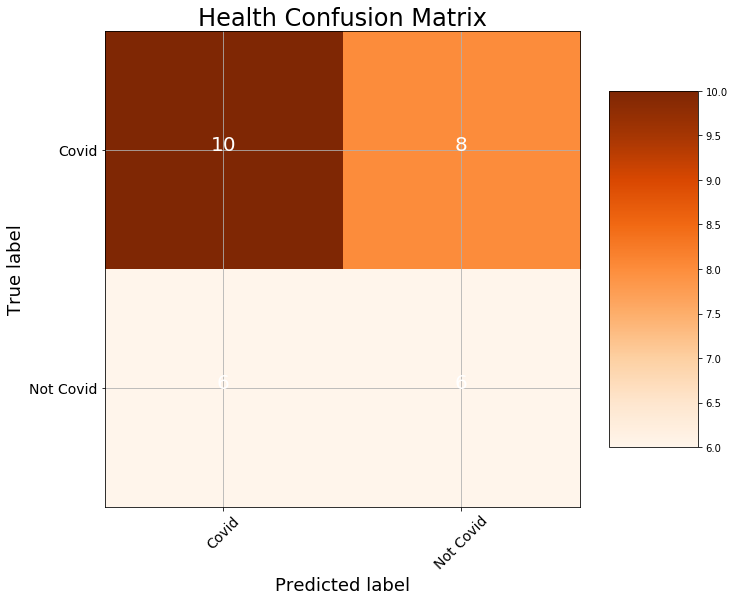

In [31]:
# Calling random forest class here:

DATASET_PATH = "roll_mfcc_test.json"

test_size = 30
ran_state = 12
rf_maxdepth = 10
rf_ran_state = 171
rf_estimators = 88


accuracy_history = []


rf = RF_Model(DATASET_PATH, test_size, ran_state, rf_maxdepth, rf_ran_state, rf_estimators)
# rf.load_data
clf, y_pred = rf.model()
#         print("Accuracy on test dataset with", max_depth, "kernel", estimators,"degree",k,"gamma",l,"C: ", accuracy)
#                 accuracy_history.append(accuracy)
#         accuracy_history.append(accuracy)
        
# test_size = 30
# ran_state = 12
# rf_maxdepth = 10
# rf_ran_state = 166
# rf_estimators = 88

# rf = RF_Model(DATASET_PATH, test_size, ran_state, rf_maxdepth, rf_ran_state, rf_estimators)
# # rf.load_data
# rf.model()

Model is running .....
Testing Accuracy: 0.8

ROC curve value is:  0.8312020460358056

Confusion matrix, without normalization
[[13  4]
 [ 4 19]]


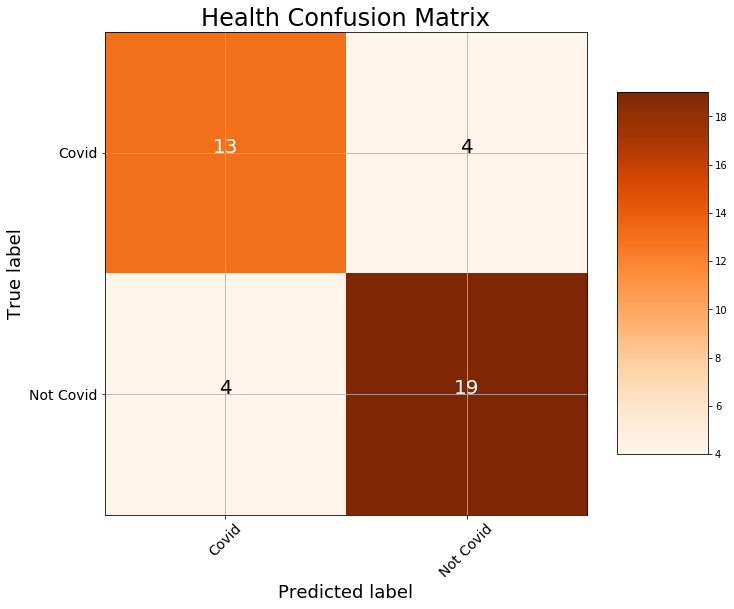

In [17]:
# Calling random forest class here with different parameters:

DATASET_PATH = "roll_mfcc.json"
test_size = 40
ran_state = 27
rf_maxdepth = 10
rf_ran_state = 171
rf_estimators = 89

rf = RF_Model(DATASET_PATH, test_size, ran_state, rf_maxdepth, rf_ran_state, rf_estimators)

rf.model()

Model is running .....
Testing Accuracy: 0.8

ROC curve value is:  0.8312020460358056

Confusion matrix, without normalization
[[13  4]
 [ 4 19]]


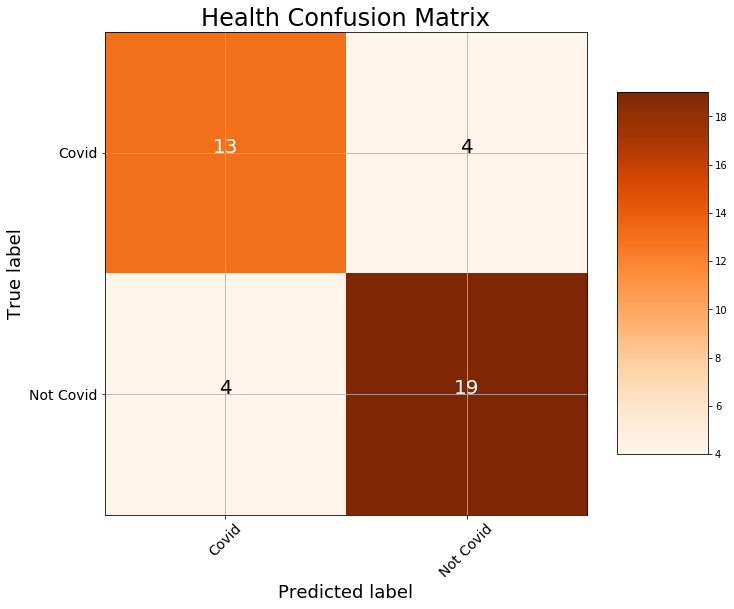

In [648]:
# Calling random forest class here with different parameters:

DATASET_PATH = "roll_mfcc.json"
test_size = 40
ran_state = 27
rf_maxdepth = 10
rf_ran_state = 171
rf_estimators = 89

rf = RF_Model(DATASET_PATH, test_size, ran_state, rf_maxdepth, rf_ran_state, rf_estimators)

rf.model()

In [929]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       312
           1       0.95      0.94      0.94       216

    accuracy                           0.95       528
   macro avg       0.95      0.95      0.95       528
weighted avg       0.95      0.95      0.95       528



# RANDOM FOREST MODEL WITH CROSS VALIDATION:

In [688]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn import preprocessing
import json
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report
        


class RF_Model:
    def __init__(self, dataset_path, n_splits, ran_state, rf_maxdepth, rf_ran_state, rf_estimators):
        self.dataset_path = dataset_path
        self.n_splits = n_splits
        self.ran_state = ran_state
        self.rf_maxdepth = rf_maxdepth
        self.rf_ran_state = rf_ran_state
        self.rf_estimators = rf_estimators
    

    def load_data(self):
        with open(self.dataset_path, "r") as fp:
            data = json.load(fp)

        # converting lists into numpy arrays
        X = np.array(data["mfcc"])
        y = np.array(data["labels"])

        return X, y
    
    def model(self):
        X, y = load_data(self.dataset_path)

        # normalized_X = preprocessing.normalize(X)

        # Split data 
        kf = KFold(n_splits=self.n_splits, random_state=self.ran_state, shuffle=True) # Define the split - into 2 folds
        
        for train_index, test_index in kf.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
        
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=self.test_size, random_state=self.ran_state, 
#                                                             shuffle=True)

        training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
        test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))


        #Create a Random forest Classifier
        clf=RandomForestClassifier(max_depth=self.rf_maxdepth, random_state=self.rf_ran_state,
                                   n_estimators = self.rf_estimators)

        #Train the model using the training sets y_pred=clf.predict(X_test)
        clf.fit(training, y_train)

        y_pred=clf.predict(test)

        # Model Accuracy, how often is the classifier correct

        print("Model is running .....")
        print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

        # Probabilities for each class
        rf_probs = clf.predict_proba(test)[:, 1]

        # Calculate roc auc
        roc_value = roc_auc_score(y_test, rf_probs)
        print()
        print("ROC curve value is: ",roc_value)
        print()
        
        print(classification_report(y_test,y_pred))
        
        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        plot_confusion_matrix(cm, classes = ['Covid', 'Not Covid'],
                              title = 'Health Confusion Matrix')

        plt.savefig('dasd.png')
        
        return clf
    
    def plot_confusion_matrix(cm, classes,
                              normalize=False,
                              title='Confusion matrix',
                              cmap=plt.cm.Oranges):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
        """
        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        # Plot the confusion matrix
        plt.figure(figsize = (10, 10))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title, size = 24)
        plt.colorbar(aspect=4)
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45, size = 14)
        plt.yticks(tick_marks, classes, size = 14)

        fmt = '.2f' if normalize else 'd'
        thresh = cm.max() / 2.

        # Labeling the plot
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

        plt.grid(None)
        plt.tight_layout()
        plt.ylabel('True label', size = 18)
        plt.xlabel('Predicted label', size = 18)
        

Model is running .....
Testing Accuracy: 1.0

ROC curve value is:  1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6

Confusion matrix, without normalization
[[4 0]
 [0 2]]


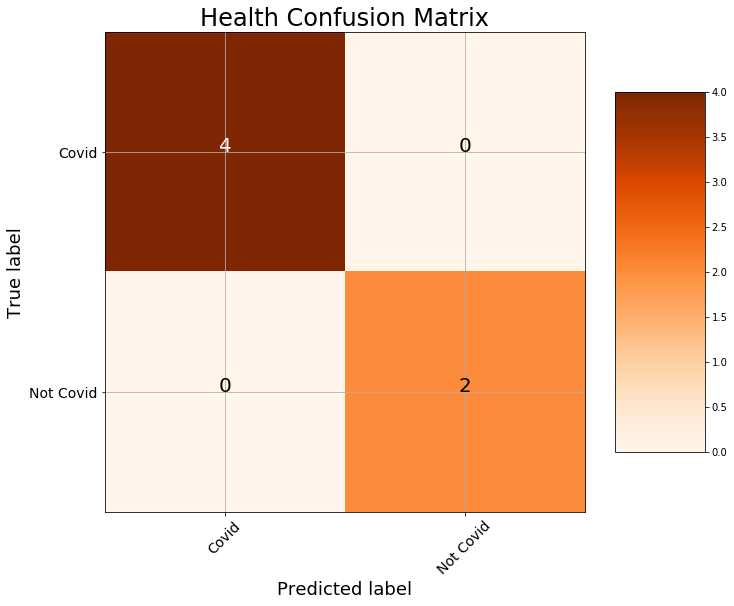

In [692]:
# Calling random forest class here with k-fold cross validation:

DATASET_PATH = "roll_mfcc.json"
n_splits = 2
ran_state = None
rf_maxdepth = 10
rf_ran_state = 171
rf_estimators = 89

rf = RF_Model(DATASET_PATH, test_size, ran_state, rf_maxdepth, rf_ran_state, rf_estimators)

model = rf.model()

In [ ]:
# So the above accuracy is obtained on 32 samples, now down below I m gonna test this model on 110 sample points. 

# HERE TESTING YOUR Testing data seperately one by one

In [748]:
DATASET_PATH = "roll_mfcc_testing1.json"

X, y = load_data(DATASET_PATH)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=49, shuffle=True)

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))

y_pred = model.predict(test)
print(y_pred)
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

[0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 1 1 1 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0
 1 0 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0
 1 0 1 0 1 1 0 1 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 1 1 1 0 1 0 1
 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1
 0 0 1 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0
 0 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0
 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 0 0]
Testing Accuracy: 0.6875


# Training random forest on new dataset containing 110 samples


Model is running .....
Testing Accuracy: 0.9090909090909091

ROC curve value is:  0.8470588235294118

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.60      0.75         5

    accuracy                           0.91        22
   macro avg       0.95      0.80      0.85        22
weighted avg       0.92      0.91      0.90        22

Confusion matrix, without normalization
[[17  0]
 [ 2  3]]


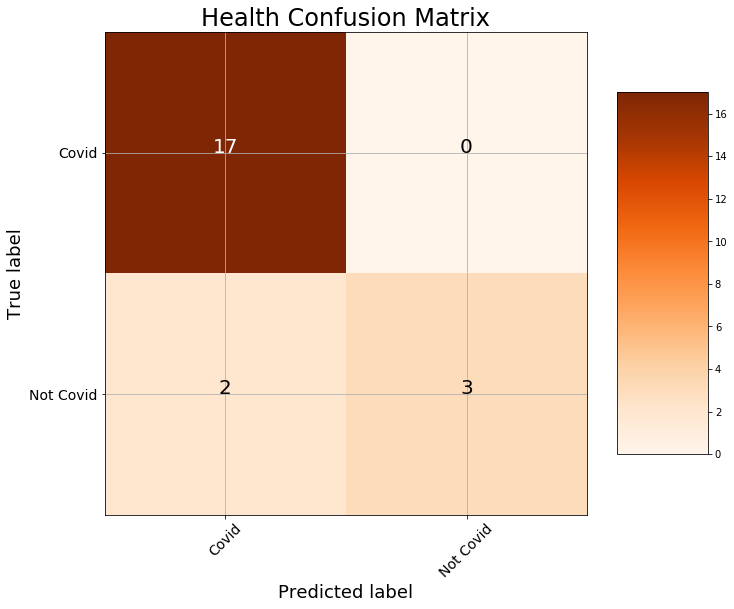

In [928]:
# here i am using 5 folds.

DATASET_PATH = "roll_mfcc_testing1.json"
n_splits = 5
ran_state = None
rf_maxdepth = 15
rf_ran_state = 159
rf_estimators = 89

rf = RF_Model(DATASET_PATH, test_size, ran_state, rf_maxdepth, rf_ran_state, rf_estimators)

model2 = rf.model()

In [870]:
# Testing the model with test dataset.

DATASET_PATH = "roll_mfcc_testing1.json"

X, y = load_data(DATASET_PATH)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=49, shuffle=True)

training = X_train.reshape(X_train.shape[0], (X_train.shape[1]*X_train.shape[2]))
test = X_test.reshape(X_test.shape[0], (X_test.shape[1]*X_test.shape[2]))

y_pred = model.predict(test)
print(y_pred)
print("Testing Accuracy:", metrics.accuracy_score(y_test, y_pred))

[0 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0
 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0
 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 1
 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1
 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 1 0 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 1
 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0
 0 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 1 0
 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0
 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 

Model is running .....
Testing Accuracy: 1.0

ROC curve value is:  1.0

Confusion matrix, without normalization
[[2 0]
 [0 4]]


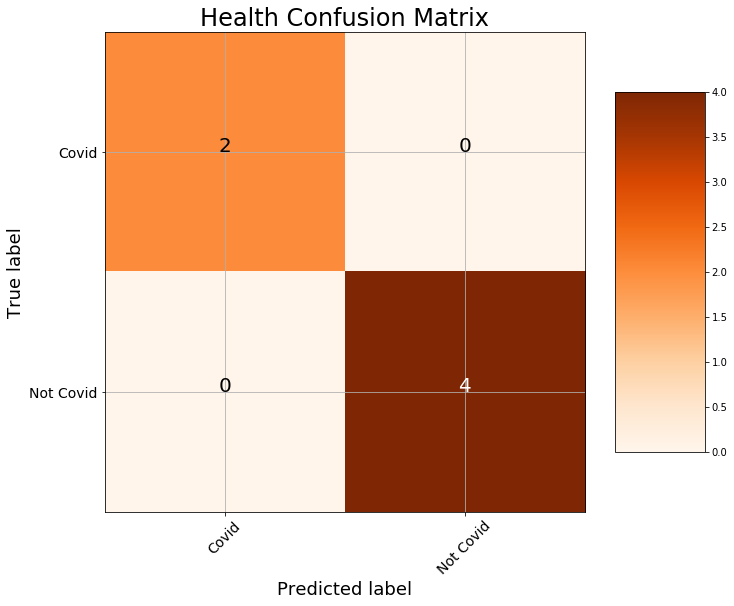

In [671]:
# Calling random forest class here with k-fold cross validation:

DATASET_PATH = "roll_mfcc.json"
n_splits = 5
ran_state = None
rf_maxdepth = 10
rf_ran_state = 171
rf_estimators = 89

rf = RF_Model(DATASET_PATH, test_size, ran_state, rf_maxdepth, rf_ran_state, rf_estimators)

model2 = rf.model()

In [ ]:
# For checking how much each feature is participating in the generalization procedure.

df1 = pd.DataFrame.from_records(x_train)     
tmp = pd.DataFrame({'Feature': df1.columns, 'Feature importance': clf_rf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show()